In [1]:
import torch
from torch import nn

import numpy as np
from numpy import dtype
import matplotlib.pyplot as plt

from tqdm import trange

import model

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

/home/loek/miniconda3/envs/rnn/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is available


In [2]:
## Generate data


def XOR_data(n_datapoints=100, seq_len=4):
    inputs = np.zeros([n_datapoints, seq_len, 1], dtype=np.float32)
    outputs = np.zeros([n_datapoints, 1], dtype=np.float32)
    for i in range(n_datapoints):
        # Generate input sequences
        for j in range(seq_len):
            bit = np.random.choice([0, 1])
            inputs[i, j, 0] = bit

        # Compute output
        problem = np.nansum(inputs[i]) % 2  # Parity
        # problem = np.sum(inputs[i]) ** 2 % 3  # Not multiple of 3
        outputs[i] = problem

    return inputs, outputs

In [3]:
## Instantiate model
model = model.Model(
    input_size=1, output_size=1, hidden_dim=30, n_layers=1, device=device
)

In [4]:
# for x in model.rnn.parameters():
#     print(x)
# print(model.fc.parameters())

In [5]:
## Generate data
inputs_1, outputs_1 = XOR_data(n_datapoints=1000, seq_len=5)
inputs_2, outputs_2 = XOR_data(n_datapoints=1000, seq_len=4)
inputs_val, outputs_val = XOR_data(n_datapoints=30, seq_len=30)
inputs_1 = torch.from_numpy(inputs_1).to(device)
outputs_1 = torch.from_numpy(outputs_1).to(device)
inputs_2 = torch.from_numpy(inputs_2).to(device)
outputs_2 = torch.from_numpy(outputs_2).to(device)
inputs_val = torch.from_numpy(inputs_val).to(device)
outputs_val = torch.from_numpy(outputs_val).to(device)

In [14]:
## Train

# Define hyperparameters
n_epochs = 3000
lr = 0.01

# Define Loss, Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train_losses = np.zeros(n_epochs)
val_losses = np.zeros(n_epochs)
# Training Run
for epoch in range(1, n_epochs + 1):
    model.train()
    model.train_step(optimizer, criterion, inputs_1, outputs_1)
    train_losses[epoch - 1] = model.train_step(
        optimizer, criterion, inputs_2, outputs_2
    )
    model.eval()
    pred_val, hidden = model(inputs_val)
    val_losses[epoch - 1] = criterion(
        torch.squeeze(pred_val), torch.squeeze(outputs_val)
    )

    if epoch % 10 == 0:
        print("Epoch: {}/{}.............".format(epoch, n_epochs), end=" ")
        print("Loss: {:.5f}".format(train_losses[epoch - 1].item()), end=" ")
        print("Validation Loss: {:.5f}".format(val_losses[epoch - 1].item()))

Epoch: 10/3000............. Loss: 0.00029 Validation Loss: 0.49352
Epoch: 20/3000............. Loss: 0.00007 Validation Loss: 0.48478
Epoch: 30/3000............. Loss: 0.00001 Validation Loss: 0.49415
Epoch: 40/3000............. Loss: 0.00000 Validation Loss: 0.49248
Epoch: 50/3000............. Loss: 0.00000 Validation Loss: 0.48395
Epoch: 60/3000............. Loss: 0.00000 Validation Loss: 0.48658
Epoch: 70/3000............. Loss: 0.00000 Validation Loss: 0.48765
Epoch: 80/3000............. Loss: 0.00000 Validation Loss: 0.48749
Epoch: 90/3000............. Loss: 0.00000 Validation Loss: 0.48773
Epoch: 100/3000............. Loss: 0.00000 Validation Loss: 0.48809
Epoch: 110/3000............. Loss: 0.00000 Validation Loss: 0.48853
Epoch: 120/3000............. Loss: 0.00000 Validation Loss: 0.48867
Epoch: 130/3000............. Loss: 0.00000 Validation Loss: 0.48889
Epoch: 140/3000............. Loss: 0.00001 Validation Loss: 0.49035
Epoch: 150/3000............. Loss: 0.00011 Validation Los

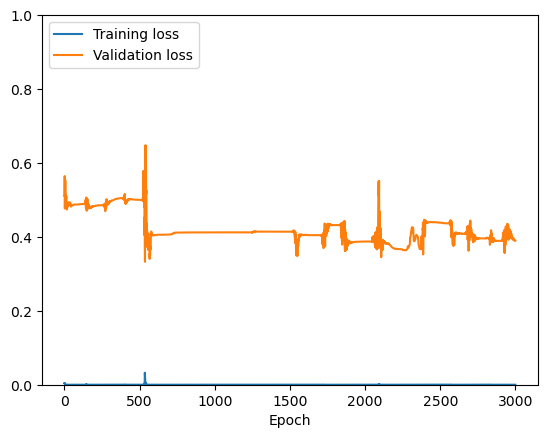

In [15]:
## Plot training and validation loss during training
skip = 0
plt.plot(train_losses[skip:], label="Training loss")
plt.plot(val_losses[skip:], label="Validation loss")
plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylim(0, 1)
plt.show()

100%|██████████| 100/100 [00:04<00:00, 22.16it/s]


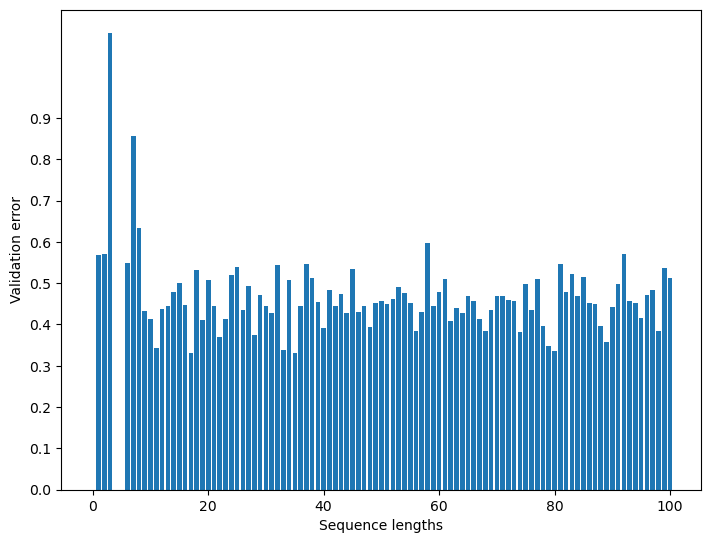

[0.00000000e+00 5.69125831e-01 5.70474088e-01 1.10650408e+00
 8.53880024e-08 7.77541587e-08 5.49808443e-01 8.56433988e-01
 6.33727908e-01 4.32483941e-01 4.12692189e-01 3.44207078e-01
 4.36997533e-01 4.44950551e-01 4.78755862e-01 5.01016080e-01
 4.48203802e-01 3.30584168e-01 5.32365322e-01 4.11486298e-01
 5.06853461e-01 4.45691675e-01 3.70181769e-01 4.14167464e-01
 5.19781828e-01 5.39621711e-01 4.34194326e-01 4.93388772e-01
 3.74329895e-01 4.70490336e-01 4.45115209e-01 4.27499384e-01
 5.44151783e-01 3.39161247e-01 5.08642316e-01 3.31919014e-01
 4.44743991e-01 5.47386289e-01 5.13108909e-01 4.55214262e-01
 3.90955180e-01 4.83926237e-01 4.45779830e-01 4.74759966e-01
 4.28386986e-01 5.33315182e-01 4.31183547e-01 4.45417047e-01
 3.93468350e-01 4.51738358e-01 4.57030147e-01 4.48805928e-01
 4.62065220e-01 4.89826113e-01 4.75149363e-01 4.51692194e-01
 3.85169208e-01 4.30695474e-01 5.97173214e-01 4.45795506e-01
 4.78424102e-01 5.10578215e-01 4.07755256e-01 4.39032733e-01
 4.27980840e-01 4.680716

In [8]:
## Plot error per sequence length
N = 100
val_err = np.zeros(N + 1)
for n in trange(1, N + 1):
    val_inputs, val_outputs = XOR_data(n_datapoints=100, seq_len=n)
    val_inputs = torch.from_numpy(val_inputs).to(device)
    val_outputs = torch.from_numpy(val_outputs).to(device)
    prediction, _ = model(val_inputs)
    val_err[n] = criterion(torch.squeeze(prediction), torch.squeeze(val_outputs))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(np.arange(N + 1), val_err)
ax.set_xlabel("Sequence lengths")
ax.set_ylabel("Validation error")
ax.set_yticks(np.arange(0, 1, 0.1))
plt.show()
print(val_err)

In [9]:
def predict(model, sequence):
    input = torch.unsqueeze(
        torch.from_numpy(np.array([sequence], dtype=np.float32)), dim=2
    ).to(device)
    out, hidden = model(input)
    return out

In [10]:
## Predict on dataset
index = 1
input = inputs_1[index]
output = torch.squeeze(outputs_1[index])
prediction, _ = model(torch.unsqueeze(input, dim=0))
prediction = torch.squeeze(prediction)
print(f"Input:{input}")
print(f"Output:{output}")
print(f"Prediction:{prediction}")
print(criterion(prediction, output))

Input:tensor([[1.],
        [0.],
        [0.],
        [1.],
        [0.]], device='cuda:0')
Output:0.0
Prediction:0.0
tensor(0., device='cuda:0', grad_fn=<MseLossBackward0>)


In [11]:
print(predict(model, [1,0,1,0,1,0,0,1]))

tensor([[0.4998]], device='cuda:0', grad_fn=<ReluBackward0>)
